In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True)


#import libraries

In [124]:
# Mount Google Drive to access files
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/Air quality prediction/air-quality-observations.csv'

df=pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [125]:
display(df.head())

,device_id,date_time,location_description,latitude,longitude,pm1,pm25,pm10,ozone,nitrogen_dioxide,carbon_monoxide,air_quality_category,point
0,ems-b879,2023-01-17T00:26:09+00:00,Fairyland,-37.546758,143.823172,3,3,4,70,97,-1006,Fair,"-37.546758, 143.823172"
1,ems-b879,2023-01-17T02:41:07+00:00,Fairyland,-37.546758,143.823172,2,2,2,75,104,218,Fair,"-37.546758, 143.823172"
2,ems-b879,2023-01-17T03:26:07+00:00,Fairyland,-37.546758,143.823172,2,2,2,61,104,743,Fair,"-37.546758, 143.823172"
3,ems-b879,2023-01-15T05:11:27+00:00,Fairyland,-37.546758,143.823172,0,0,0,70,119,-2143,Fair,"-37.546758, 143.823172"
4,ems-b879,2022-12-23T19:45:10+00:00,Fairyland,-37.546758,143.823172,3,4,4,65,119,-4766,Fair,"-37.546758, 143.823172"


In [126]:
df.tail()

,device_id,date_time,location_description,latitude,longitude,pm1,pm25,pm10,ozone,nitrogen_dioxide,carbon_monoxide,air_quality_category,point
110966,ems-b879,2022-03-31T04:14:19+00:00,Fairyland,-37.546758,143.823172,1,1,1,61,97,-4242,Moderate,"-37.546758, 143.823172"
110967,ems-b879,2022-03-31T04:29:19+00:00,Fairyland,-37.546758,143.823172,0,0,1,65,97,-4242,Moderate,"-37.546758, 143.823172"
110968,ems-b879,2022-03-31T04:44:19+00:00,Fairyland,-37.546758,143.823172,0,0,1,70,97,-4154,Moderate,"-37.546758, 143.823172"
110969,ems-b879,2022-03-31T04:59:18+00:00,Fairyland,-37.546758,143.823172,0,0,0,61,97,-4242,Moderate,"-37.546758, 143.823172"
110970,ems-b879,2022-03-31T05:14:18+00:00,Fairyland,-37.546758,143.823172,0,0,0,75,112,-4416,Moderate,"-37.546758, 143.823172"


In [127]:
# Convert to datetime
df["date_time"] = pd.to_datetime(df["date_time"])

In [128]:
df.dtypes

,0
device_id,object
date_time,"datetime64[ns, UTC]"
location_description,object
latitude,float64
longitude,float64
pm1,int64
pm25,int64
pm10,int64
ozone,int64
nitrogen_dioxide,int64


In [129]:
df=df.rename(columns={"device_id": "ID","date_time": "Time","location_description": "Location", "latitude":"Latitude", "longitude": "longitude", "pm1":"PM1","pm25":"PM25", "pm10":"PM10" ,"ozone":"O3","nitrogen_dioxide":"NO2","carbon_monoxide":"CO","air_quality_category": "AQ","point":"Point"})
display(df.head())

,ID,Time,Location,Latitude,longitude,PM1,PM25,PM10,O3,NO2,CO,AQ,Point
0,ems-b879,2023-01-17 00:26:09+00:00,Fairyland,-37.546758,143.823172,3,3,4,70,97,-1006,Fair,"-37.546758, 143.823172"
1,ems-b879,2023-01-17 02:41:07+00:00,Fairyland,-37.546758,143.823172,2,2,2,75,104,218,Fair,"-37.546758, 143.823172"
2,ems-b879,2023-01-17 03:26:07+00:00,Fairyland,-37.546758,143.823172,2,2,2,61,104,743,Fair,"-37.546758, 143.823172"
3,ems-b879,2023-01-15 05:11:27+00:00,Fairyland,-37.546758,143.823172,0,0,0,70,119,-2143,Fair,"-37.546758, 143.823172"
4,ems-b879,2022-12-23 19:45:10+00:00,Fairyland,-37.546758,143.823172,3,4,4,65,119,-4766,Fair,"-37.546758, 143.823172"


# Handling missing values and remove duplicates - IT24102281

In [130]:
df.shape

(110971, 13)

In [131]:
df.count()

,0
ID,110971
Time,110970
Location,110971
Latitude,110971
longitude,110971
PM1,110971
PM25,110971
PM10,110971
O3,110971
NO2,110971


In [132]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

#check duplicate rows

number of duplicate rows:  (0, 13)


No duplicate rows

In [133]:
# Check for missing values in each column
missing_values = df.isnull().sum()
print("Missing Values in Each Column:")
print(missing_values)

Missing Values in Each Column:
ID           0
Time         1
Location     0
Latitude     0
longitude    0
PM1          0
PM25         0
PM10         0
O3           0
NO2          0
CO           0
AQ           0
Point        0
dtype: int64


Time has a one missing value


Percentage of Missing Values in Each Column:
ID           0.000000
Time         0.000901
Location     0.000000
Latitude     0.000000
longitude    0.000000
PM1          0.000000
PM25         0.000000
PM10         0.000000
O3           0.000000
NO2          0.000000
CO           0.000000
AQ           0.000000
Point        0.000000
dtype: float64


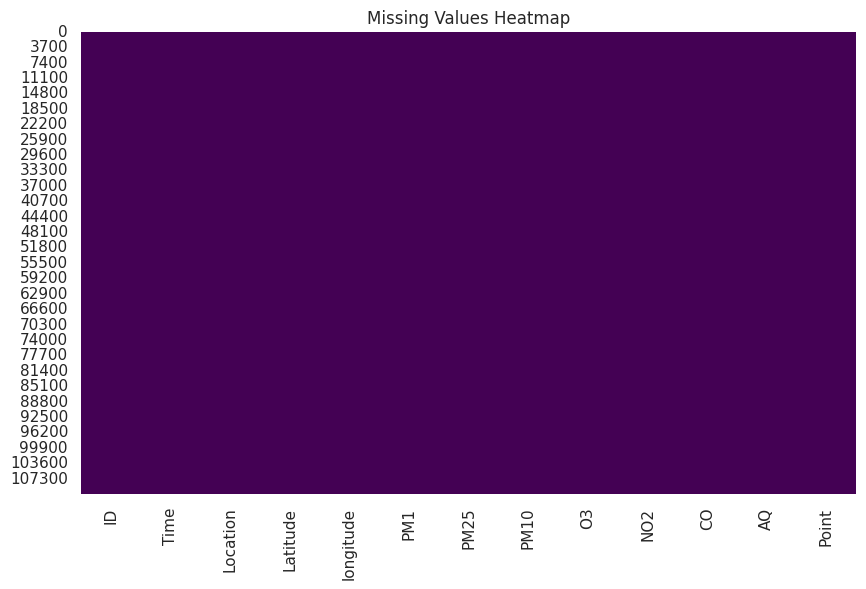

In [134]:
# Calculate the percentage of missing values
missing_percentage = (missing_values / len(df)) * 100
print("\nPercentage of Missing Values in Each Column:")
print(missing_percentage)

# Visualize missing values using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.savefig('/content/drive/MyDrive/Air quality prediction/eda_visualizations/missing_value.png')
plt.show()

In [135]:
df=df.dropna()
df.count()

#remove the missing value

,0
ID,110970
Time,110970
Location,110970
Latitude,110970
longitude,110970
PM1,110970
PM25,110970
PM10,110970
O3,110970
NO2,110970


# Remove Outliers- IT23782372

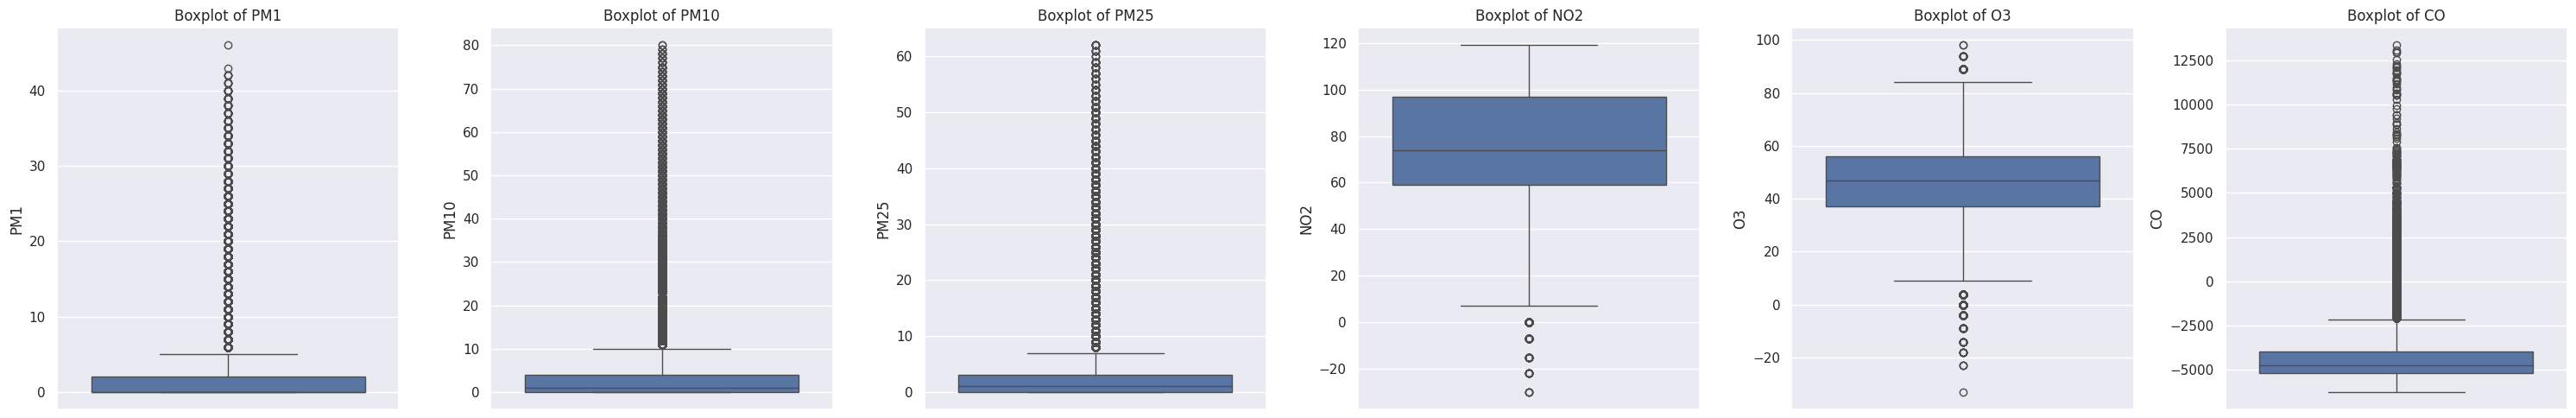

Original shape of the dataset: (110970, 13)
Shape of the dataset after removing outliers: (89700, 13)


In [136]:
#visulalized Outliers

plt.figure(figsize=(30, 5))

plt.subplot(1, 6, 1)
sns.boxplot(y=df['PM1'])
plt.title('Boxplot of PM1')

plt.subplot(1, 6, 2)
sns.boxplot(y=df['PM10'])
plt.title('Boxplot of PM10')

plt.subplot(1, 6, 3)
sns.boxplot(y=df['PM25'])
plt.title('Boxplot of PM25')

plt.subplot(1, 6, 4)
sns.boxplot(y=df['NO2'])
plt.title('Boxplot of NO2')

plt.subplot(1, 6, 5)
sns.boxplot(y=df['O3'])
plt.title('Boxplot of O3')

plt.subplot(1, 6, 6)
sns.boxplot(y=df['CO'])
plt.title('Boxplot of CO')


plt.tight_layout()
# Save the plot
plt.savefig('/content/drive/MyDrive/Air quality prediction/eda_visualizations/outliers.png')
plt.show()

#remove outliers
numeric_cols=['PM1', 'PM25', 'PM10', 'O3', 'NO2', 'CO']


Q1=df[numeric_cols].quantile(0.25)
Q3=df[numeric_cols].quantile(0.75)
IQR=Q3-Q1


condition =~((df[numeric_cols] < (Q1-1.5*IQR)) | (df[numeric_cols] > (  Q3+1.5*IQR))).any (axis=1)

df_cleaned = df[condition]
print(f"Original shape of the dataset: {df.shape}")
print(f"Shape of the dataset after removing outliers: {df_cleaned.shape}")





# Scalling- IT23746046

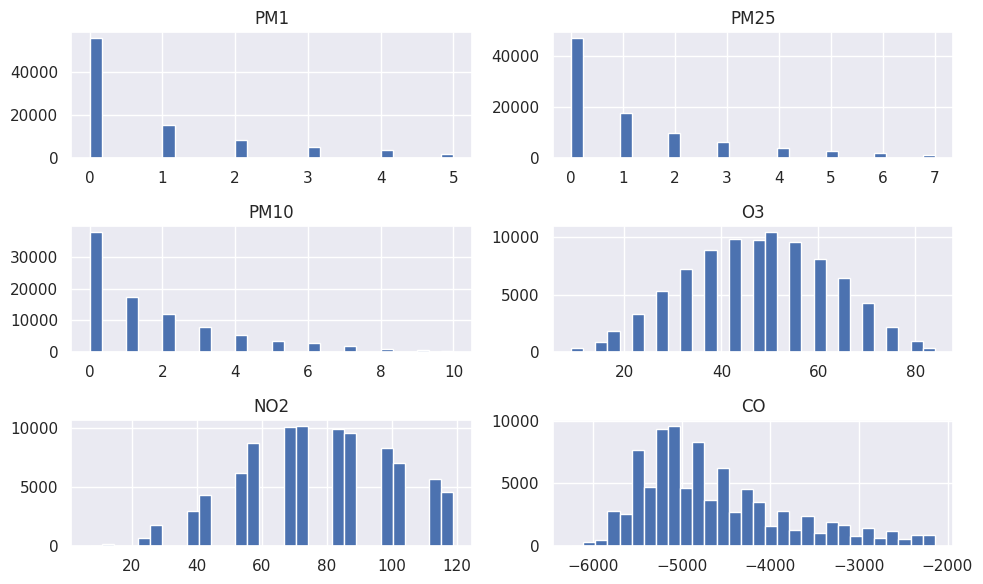

<Figure size 640x480 with 0 Axes>

,ID,Time,Location,Latitude,longitude,PM1,PM25,PM10,O3,NO2,CO,AQ,Point
3,ems-b879,2023-01-15 05:11:27+00:00,Fairyland,-37.546758,143.823172,0.0,0.000000,0.0,0.813333,1.000000,1.000000,Fair,"-37.546758, 143.823172"
4,ems-b879,2022-12-23 19:45:10+00:00,Fairyland,-37.546758,143.823172,0.6,0.571429,0.4,0.746667,1.000000,0.361800,Fair,"-37.546758, 143.823172"
5,ems-b879,2022-12-23 20:30:10+00:00,Fairyland,-37.546758,143.823172,0.6,0.714286,0.6,0.626667,0.803571,0.425547,Fair,"-37.546758, 143.823172"
6,ems-b879,2022-12-23 21:30:09+00:00,Fairyland,-37.546758,143.823172,0.2,0.142857,0.1,0.506667,0.598214,0.574453,Fair,"-37.546758, 143.823172"
7,ems-b879,2022-12-23 22:00:10+00:00,Fairyland,-37.546758,143.823172,0.4,0.285714,0.2,0.746667,0.937500,0.510706,Fair,"-37.546758, 143.823172"


In [137]:
# Visualizations
# ii) Histograms
num_cols = ["PM1","PM25","PM10","O3","NO2","CO"]
df_cleaned[num_cols].hist(bins=30, figsize=(10,6))
plt.tight_layout(); plt.show()

# Save the plot
plt.savefig('/content/drive/MyDrive/Air quality prediction/eda_visualizations/wothoutScale.png')
plt.show()
# MinMax scaling
from sklearn.preprocessing import MinMaxScaler

df_scaled=df_cleaned.copy()
scaler= MinMaxScaler()
scale_cols=['PM1','PM25','PM10','O3','NO2','CO']
df_scaled[scale_cols]=scaler.fit_transform(df_cleaned[scale_cols])
df_scaled.head()



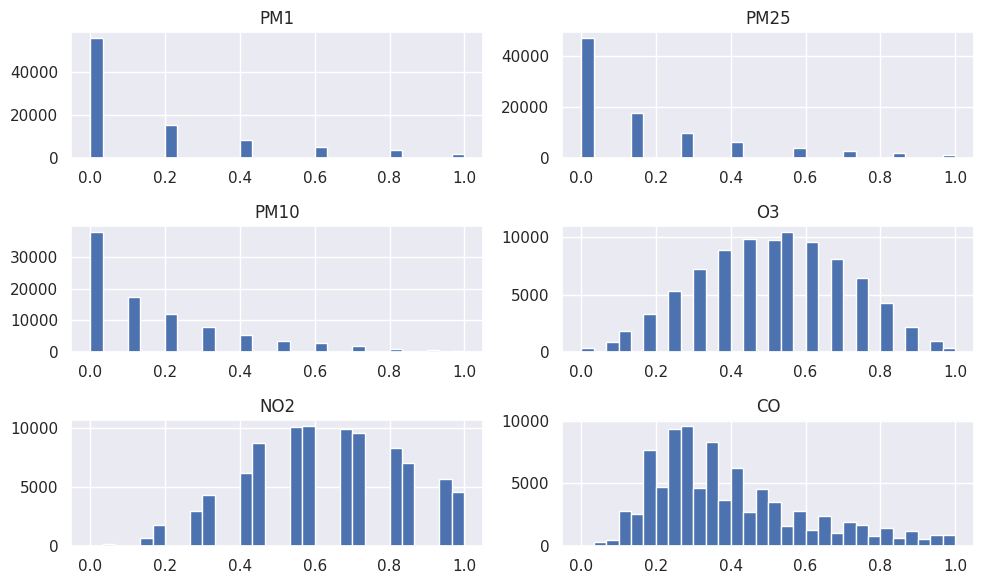

In [138]:
#  Histograms(after scalling)
num_cols = ["PM1","PM25","PM10","O3","NO2","CO"]
df_scaled[num_cols].hist(bins=30, figsize=(10,6))
plt.tight_layout();
# Save the plot
plt.savefig('/content/drive/MyDrive/Air quality prediction/eda_visualizations/withScale.png')
plt.show()



# Encoding Categorical Variables- IT23750692

In [139]:
df_scaled.dtypes

,0
ID,object
Time,"datetime64[ns, UTC]"
Location,object
Latitude,float64
longitude,float64
PM1,float64
PM25,float64
PM10,float64
O3,float64
NO2,float64


In [140]:
df_encoded=df_scaled.copy()
df_encoded["AQ"]= df_encoded["AQ"].map({"Good":0,"Fair":1,  "Moderate":2, "Poor":3})

#label encoding

/tmp/ipython-input-1199605159.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='AQ', data=df_encoded, palette='viridis')


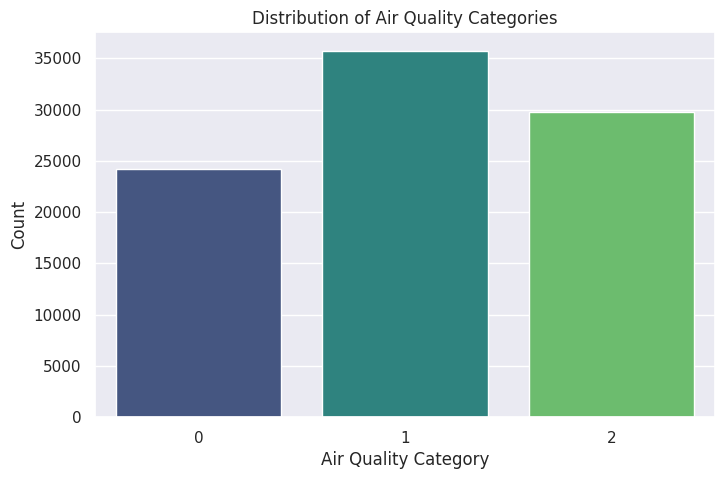

In [141]:
plt.figure(figsize=(8, 5))
sns.countplot(x='AQ', data=df_encoded, palette='viridis')
plt.title('Distribution of Air Quality Categories')
plt.xlabel('Air Quality Category')
plt.ylabel('Count')
# Save the plot
plt.savefig('/content/drive/MyDrive/Air quality prediction/eda_visualizations/categories.png')
plt.show()

# Feature selection and creation - IT24104172

In [142]:
df_selected=df_encoded.copy()
df_selected= df_encoded.drop(columns=["ID","Location","Latitude","longitude","Point"])

In [143]:
df_selected.head()

,Time,PM1,PM25,PM10,O3,NO2,CO,AQ
3,2023-01-15 05:11:27+00:00,0.0,0.000000,0.0,0.813333,1.000000,1.000000,1
4,2022-12-23 19:45:10+00:00,0.6,0.571429,0.4,0.746667,1.000000,0.361800,1
5,2022-12-23 20:30:10+00:00,0.6,0.714286,0.6,0.626667,0.803571,0.425547,1
6,2022-12-23 21:30:09+00:00,0.2,0.142857,0.1,0.506667,0.598214,0.574453,1
7,2022-12-23 22:00:10+00:00,0.4,0.285714,0.2,0.746667,0.937500,0.510706,1


Selected Features <80:
['CO']


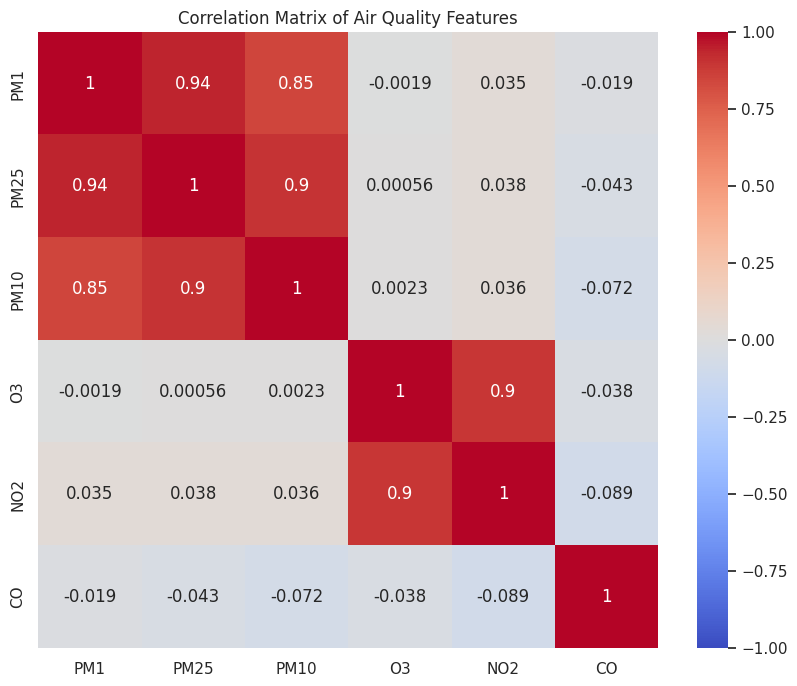

In [144]:


corr_matrix = df_selected[['PM1', 'PM25', 'PM10', 'O3', 'NO2', 'CO']].corr()


corr_matrix_no_self = corr_matrix.copy()

np.fill_diagonal(corr_matrix_no_self.values, 0)

max_abs_corr = corr_matrix_no_self.abs().max()

selected_features = max_abs_corr[max_abs_corr < 0.8].index.tolist()


print("Selected Features <80:")
print(selected_features)

# EDA Visualization
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Air Quality Features')
plt.savefig('/content/drive/MyDrive/Air quality prediction/eda_visualizations/correlation_matrix.png')
plt.show()

Dataset with the new 'Avg_PM' feature:


/tmp/ipython-input-1248714146.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AQ', y='Avg_PM', data=df_selected, palette='deep')


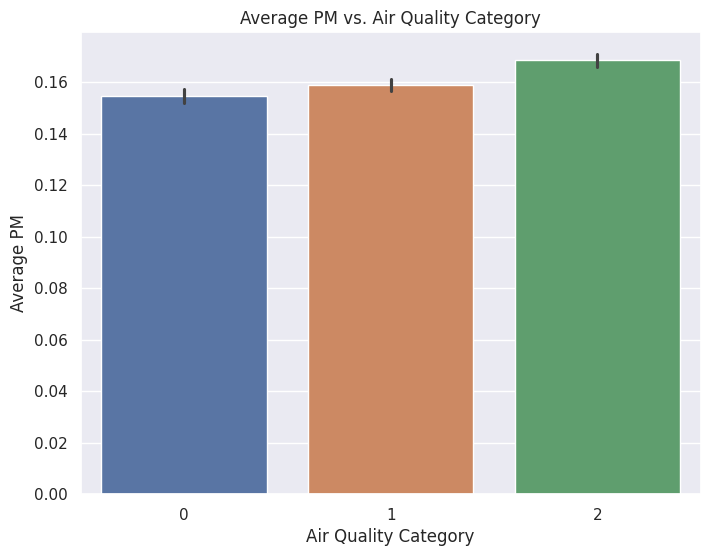


Correlation of 'Avg_PM' with 'AQ':
0.024585500571597994


In [145]:
#add new feature called Avg_PM

df_selected['Avg_PM'] = (df_selected['PM1'] + df_selected['PM25'] + df_selected['PM10'])/3

print("Dataset with the new 'Avg_PM' feature:")
df_selected.head()

plt.figure(figsize=(8, 6))
sns.barplot(x='AQ', y='Avg_PM', data=df_selected, palette='deep')
plt.title('Average PM vs. Air Quality Category')
plt.xlabel('Air Quality Category')
plt.ylabel('Average PM')
# Save the plot (adjust the path as needed)
plt.savefig('/content/drive/MyDrive/Air quality prediction/eda_visualizations/total_pm.png')
plt.show()

# Check the correlation of the new feature
print("\nCorrelation of 'Avg_PM' with 'AQ':")
print(df_selected.corr()['AQ']['Avg_PM'])

Dataset with the new 'Avg_O3_NO2' feature:


/tmp/ipython-input-2895257873.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AQ', y='Avg_O3_NO2', data=df_selected, palette='deep')


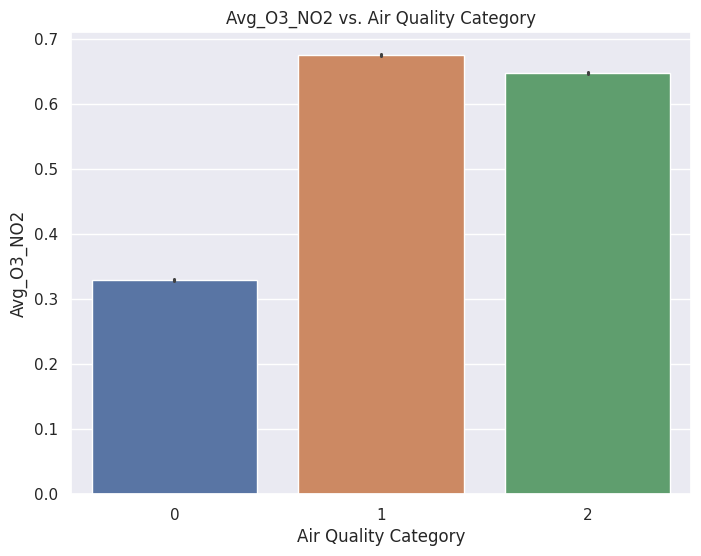


Correlation of 'Avg_O3_NO2' with 'AQ':
0.5951242396141353


In [146]:
#add new feature called Avg_O3_NO2

df_selected['Avg_O3_NO2'] = (df_selected['O3'] + df_selected['NO2'] )/2

print("Dataset with the new 'Avg_O3_NO2' feature:")
df_selected.head()

plt.figure(figsize=(8, 6))
sns.barplot(x='AQ', y='Avg_O3_NO2', data=df_selected, palette='deep')
plt.title('Avg_O3_NO2 vs. Air Quality Category')
plt.xlabel('Air Quality Category')
plt.ylabel('Avg_O3_NO2')
# Save the plot (adjust the path as needed)
plt.savefig('/content/drive/MyDrive/Air quality prediction/eda_visualizations/total_pm.png')
plt.show()

# Check the correlation of the new feature
print("\nCorrelation of 'Avg_O3_NO2' with 'AQ':")
print(df_selected.corr()['AQ']['Avg_O3_NO2'])

In [147]:
df_selected.head()

,Time,PM1,PM25,PM10,O3,NO2,CO,AQ,Avg_PM,Avg_O3_NO2
3,2023-01-15 05:11:27+00:00,0.0,0.000000,0.0,0.813333,1.000000,1.000000,1,0.000000,0.906667
4,2022-12-23 19:45:10+00:00,0.6,0.571429,0.4,0.746667,1.000000,0.361800,1,0.523810,0.873333
5,2022-12-23 20:30:10+00:00,0.6,0.714286,0.6,0.626667,0.803571,0.425547,1,0.638095,0.715119
6,2022-12-23 21:30:09+00:00,0.2,0.142857,0.1,0.506667,0.598214,0.574453,1,0.147619,0.552440
7,2022-12-23 22:00:10+00:00,0.4,0.285714,0.2,0.746667,0.937500,0.510706,1,0.295238,0.842083


# dimension reduction -IT24101981

Explained variance ratio by the 3 components: [0.47562471 0.36219755 0.12424125]
Total variance explained by the 3 components: 0.9621 (96.21%)


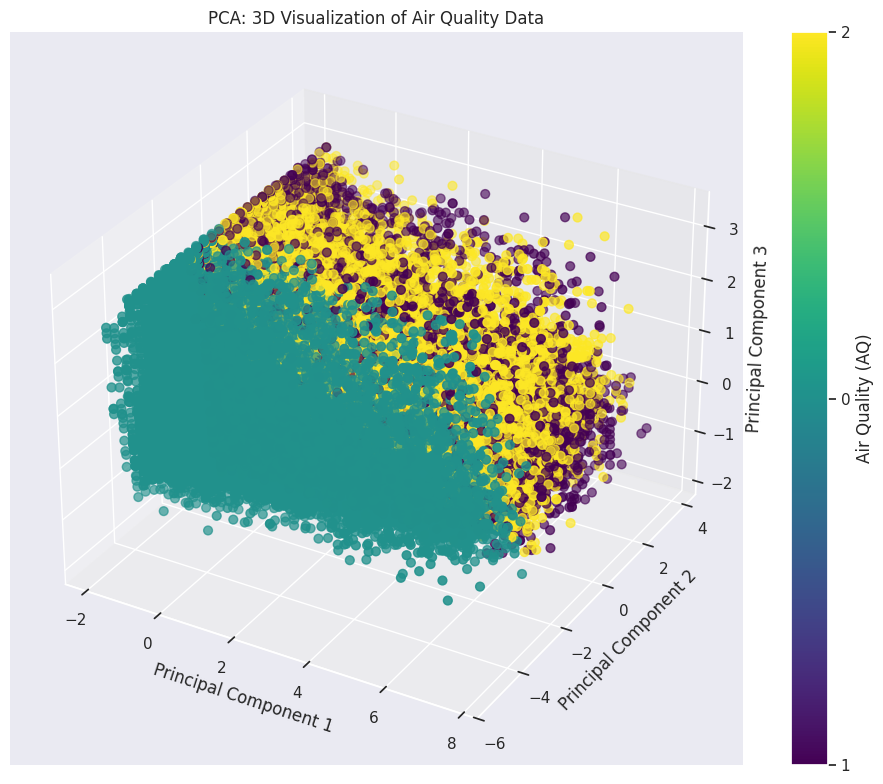

Newly created DataFrame with Time, PCA components, and AQ:
                       Time    PC1_3d    PC2_3d    PC3_3d  AQ
0 2023-01-15 05:11:27+00:00 -1.295210  2.818385  3.070431   1
1 2022-12-23 19:45:10+00:00  3.351908  2.341241  0.091409   1
2 2022-12-23 20:30:10+00:00  4.277607  0.887461  0.334434   1
3 2022-12-23 21:30:09+00:00 -0.182888 -0.211758  0.881796   1
4 2022-12-23 22:00:10+00:00  1.296838  2.193056  0.752165   1

Data types of the new DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89700 entries, 0 to 89699
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype              
---  ------  --------------  -----              
 0   Time    89700 non-null  datetime64[ns, UTC]
 1   PC1_3d  89700 non-null  float64            
 2   PC2_3d  89700 non-null  float64            
 3   PC3_3d  89700 non-null  float64            
 4   AQ      89700 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(3), int64(1)
memory usage: 3.4 MB
None


In [148]:
# Import necessary libraries

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

# --- Step 1: Data Preparation and Scaling ---

# Select numerical columns to apply PCA on
numerical_columns = ['PM1', 'PM25', 'PM10', 'O3', 'NO2', 'CO', 'Avg_PM', 'Avg_O3_NO2']

# Standardize the numerical data before PCA
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected[numerical_columns])

# --- Step 2: Apply PCA and Add Components to DataFrame ---

# Apply PCA to reduce the data to 3 components
pca_3d = PCA(n_components=3)
# IMPORTANT: Use the scaled data for PCA
pca_result_3d = pca_3d.fit_transform(df_scaled)

# Create a copy of the dataframe to store PCA results
df_pca = df_selected.copy()

# Add the 3 principal components to the new dataframe
df_pca['PC1_3d'] = pca_result_3d[:, 0]
df_pca['PC2_3d'] = pca_result_3d[:, 1]
df_pca['PC3_3d'] = pca_result_3d[:, 2]

# --- Step 3: Explained Variance Ratio ---

# Print the variance explained by each of the 3 components
print(f"Explained variance ratio by the 3 components: {pca_3d.explained_variance_ratio_}")
# Print the total variance explained by the 3 components
cumulative_variance = np.sum(pca_3d.explained_variance_ratio_)
print(f"Total variance explained by the 3 components: {cumulative_variance:.4f} ({cumulative_variance * 100:.2f}%)")

# --- Step 4: 3D Visualization ---

# Convert the 'AQ' column to numerical categories for coloring
# pd.factorize is a convenient way to get numeric codes and the original labels
aq_numeric, aq_labels = pd.factorize(df_pca['AQ'])

# Create a 3D scatter plot for the PCA results
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for the 3D PCA result
scatter = ax.scatter(df_pca['PC1_3d'], df_pca['PC2_3d'], df_pca['PC3_3d'],
                     c=aq_numeric,
                     cmap='viridis',
                     s=40) # Adjust marker size

# Set labels for the axes
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

# Title for the plot
plt.title('PCA: 3D Visualization of Air Quality Data')

# Add a color bar for the scatter plot
cbar = plt.colorbar(scatter, ticks=range(len(aq_labels)))
cbar.set_ticklabels(aq_labels)
cbar.set_label('Air Quality (AQ)')

# Adjust layout and display the plot
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Air quality prediction/eda_visualizations/pca_3d_final.png')
plt.show()


# First, ensure your 'time' column is accessible.
# If 'time' is the index of your DataFrame, reset it to become a regular column.
if 'time' not in df_pca.columns:
    # This checks if a 'time' column exists. If not, it assumes it's the index.
    df_pca_reset = df_pca.reset_index()
else:
    # If 'time' is already a column, just use the DataFrame as is.
    df_pca_reset = df_pca

# Define the list of columns you want to keep
columns_to_select = ['Time', 'PC1_3d', 'PC2_3d', 'PC3_3d', 'AQ']

# Create the new DataFrame by selecting only these columns
# Using .copy() is important to avoid SettingWithCopyWarning later on
df_final_pca = df_pca_reset[columns_to_select].copy()

# --- Verification ---
print("Newly created DataFrame with Time, PCA components, and AQ:")
print(df_final_pca.head())
print("\nData types of the new DataFrame:")
print(df_final_pca.info())

In [149]:
df_final_pca.to_csv("final_dataset.csv", index=False)
print("Final dataset saved to 'final_dataset.csv'")

Final dataset saved to 'final_dataset.csv'
